#Set UP environment


In [1]:
from google.colab import drive
drive.mount('/content/drive')
! unzip -q "/content/drive/Shareddrives/UwU w what's dis /B2.onlybee.yolov8.zip" -d ./SavedModel
! ls ./SavedModel

Mounted at /content/drive
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt
import cv2 as cv

# Create the File System

In [3]:
%cd ../
!mkdir tmp
%cd tmp

/
mkdir: cannot create directory ‘tmp’: File exists
/tmp


# Download YoloV7

In [4]:
# Download YOLOv7
!git clone https://github.com/WongKinYiu/yolov7.git # clone repo
%cd yolov7
# Install dependencies
%pip install -qr requirements.txt  # install dependencies

%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 1197 (delta 2), reused 3 (delta 1), pack-reused 1191
Receiving objects: 100% (1197/1197), 74.23 MiB | 1.69 MiB/s, done.
Resolving deltas: 100% (517/517), done.
/tmp/yolov7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.0 MB/s eta 0:00:00
/tmp
Setup complete. Using torch 2.1.0+cu118 (Tesla T4)


In [5]:
%cd yolov7

/tmp/yolov7


# Train the YoloV7 Model

In [8]:
!python train.py --img 416 --batch 16 --epochs 300 --data /content/SavedModel/data.yaml  --weights 'yolov7.pt'

2023-12-06 14:02:56.237536: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 14:02:56.237587: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 14:02:56.237621: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 14:02:56.244710: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 14:02:57.534214: W tensorflow/c

# Look at Training Results

In [27]:
torch.load("/tmp/yolov7/runs/train/exp2/weights/best.pt")

{'epoch': -1,
 'best_fitness': array([    0.76948]),
 'training_results': None,
 'model': Model(
   (model): Sequential(
     (0): Conv(
       (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU()
     )
     (1): Conv(
       (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU()
     )
     (2): Conv(
       (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU()
     )
     (3): Conv(
       (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_ru

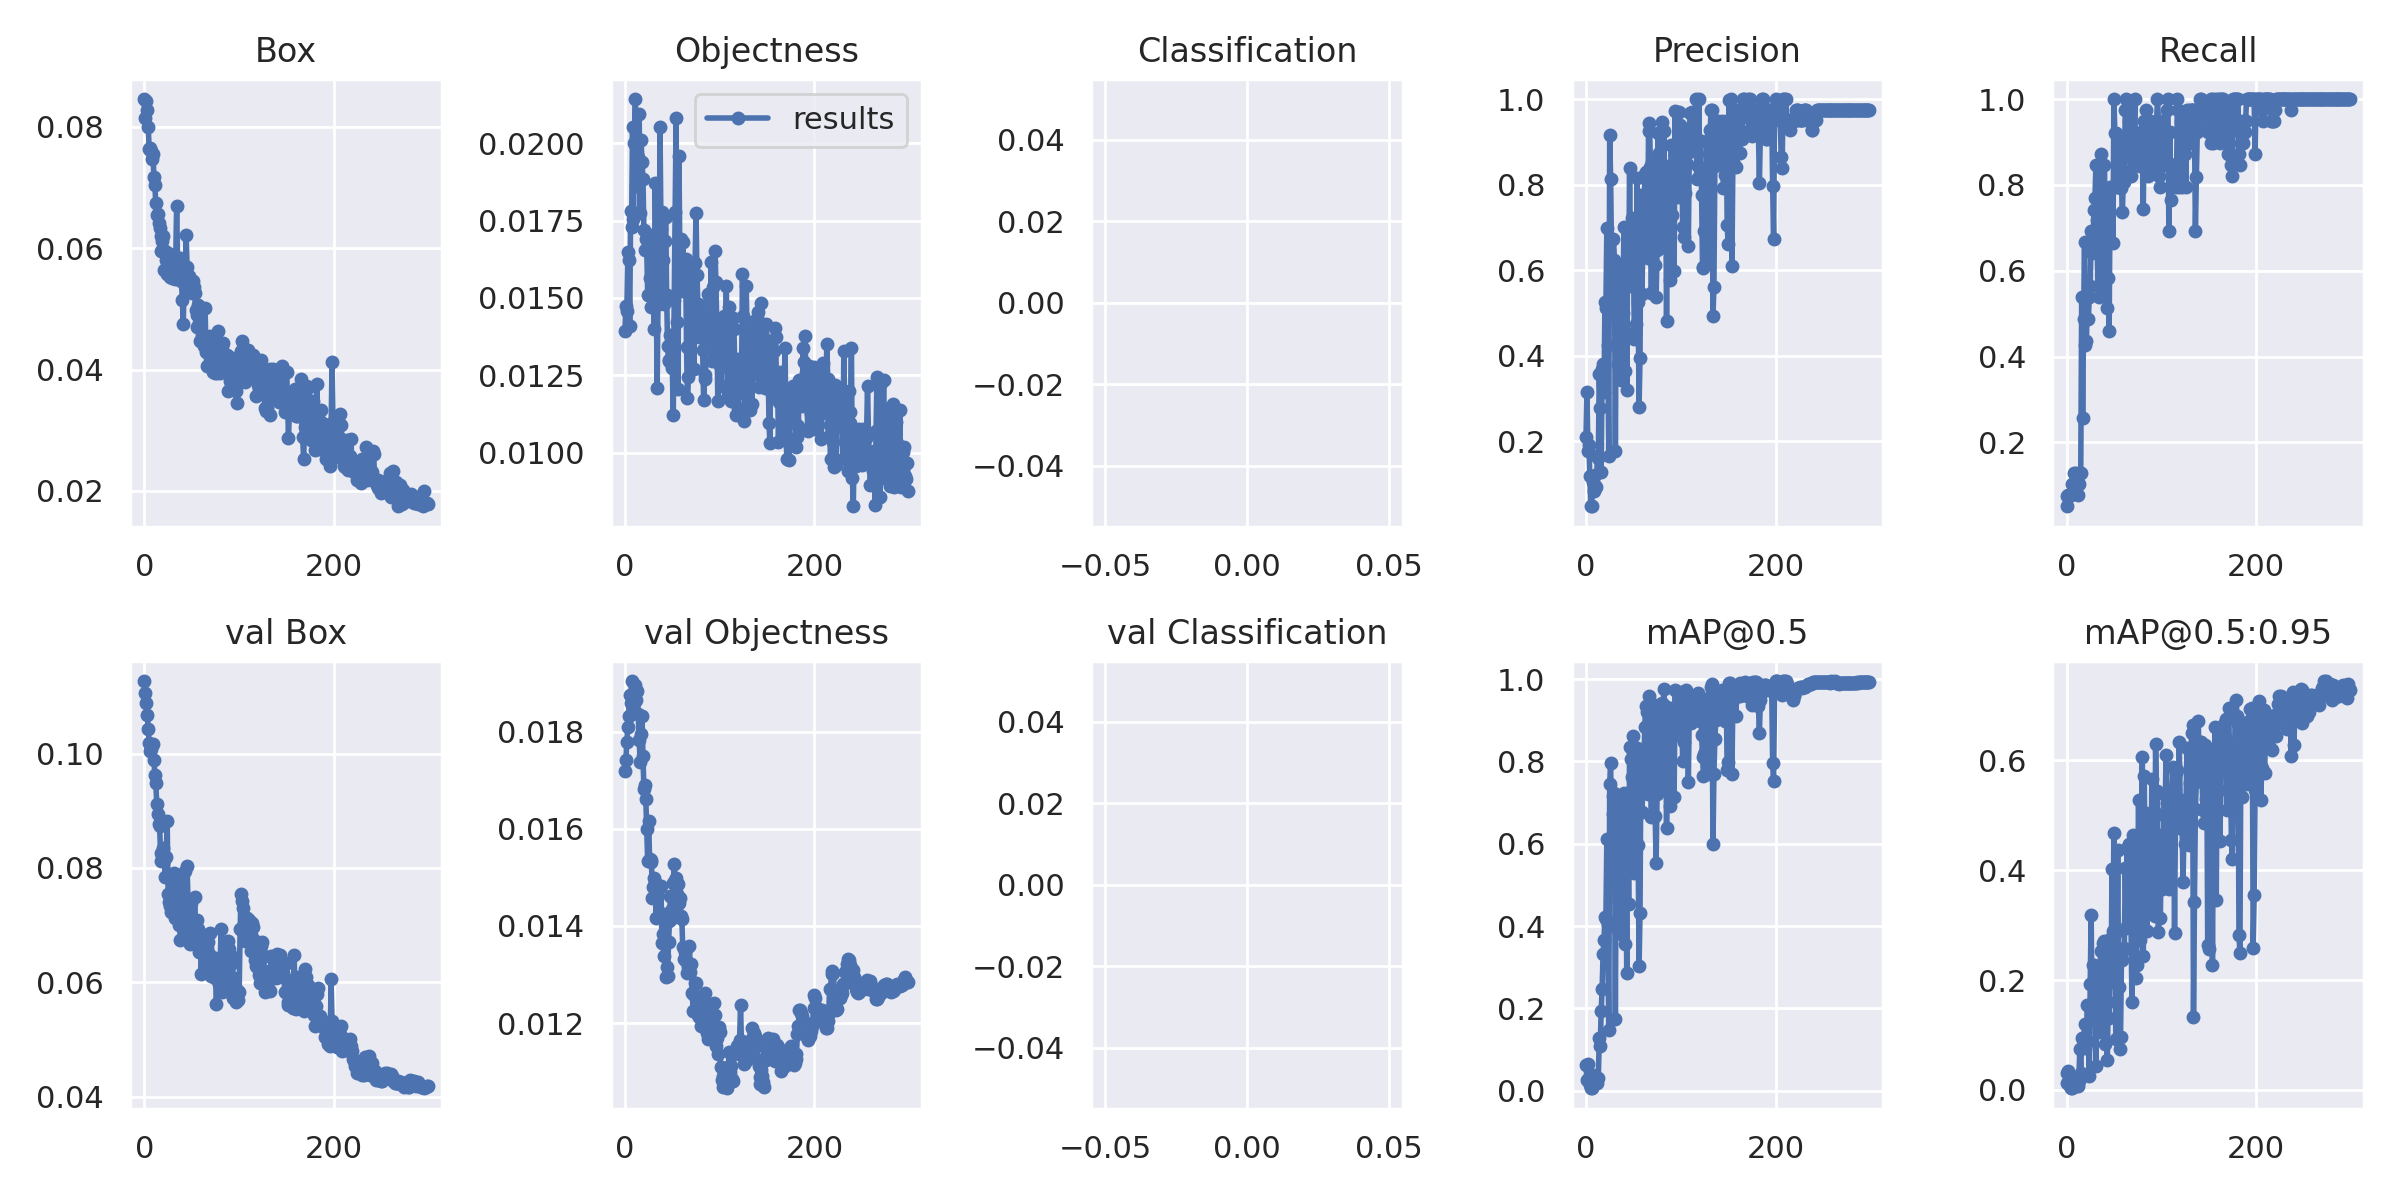

In [28]:
from google.colab.patches import cv2_imshow
img = cv.imread("runs/train/exp2/results.png")
plt.figure(figsize=(15, 15))
# plt.imshow(img)
cv2_imshow(img)

# Model Validation Output

Let's look at how the model performed on a validation batch

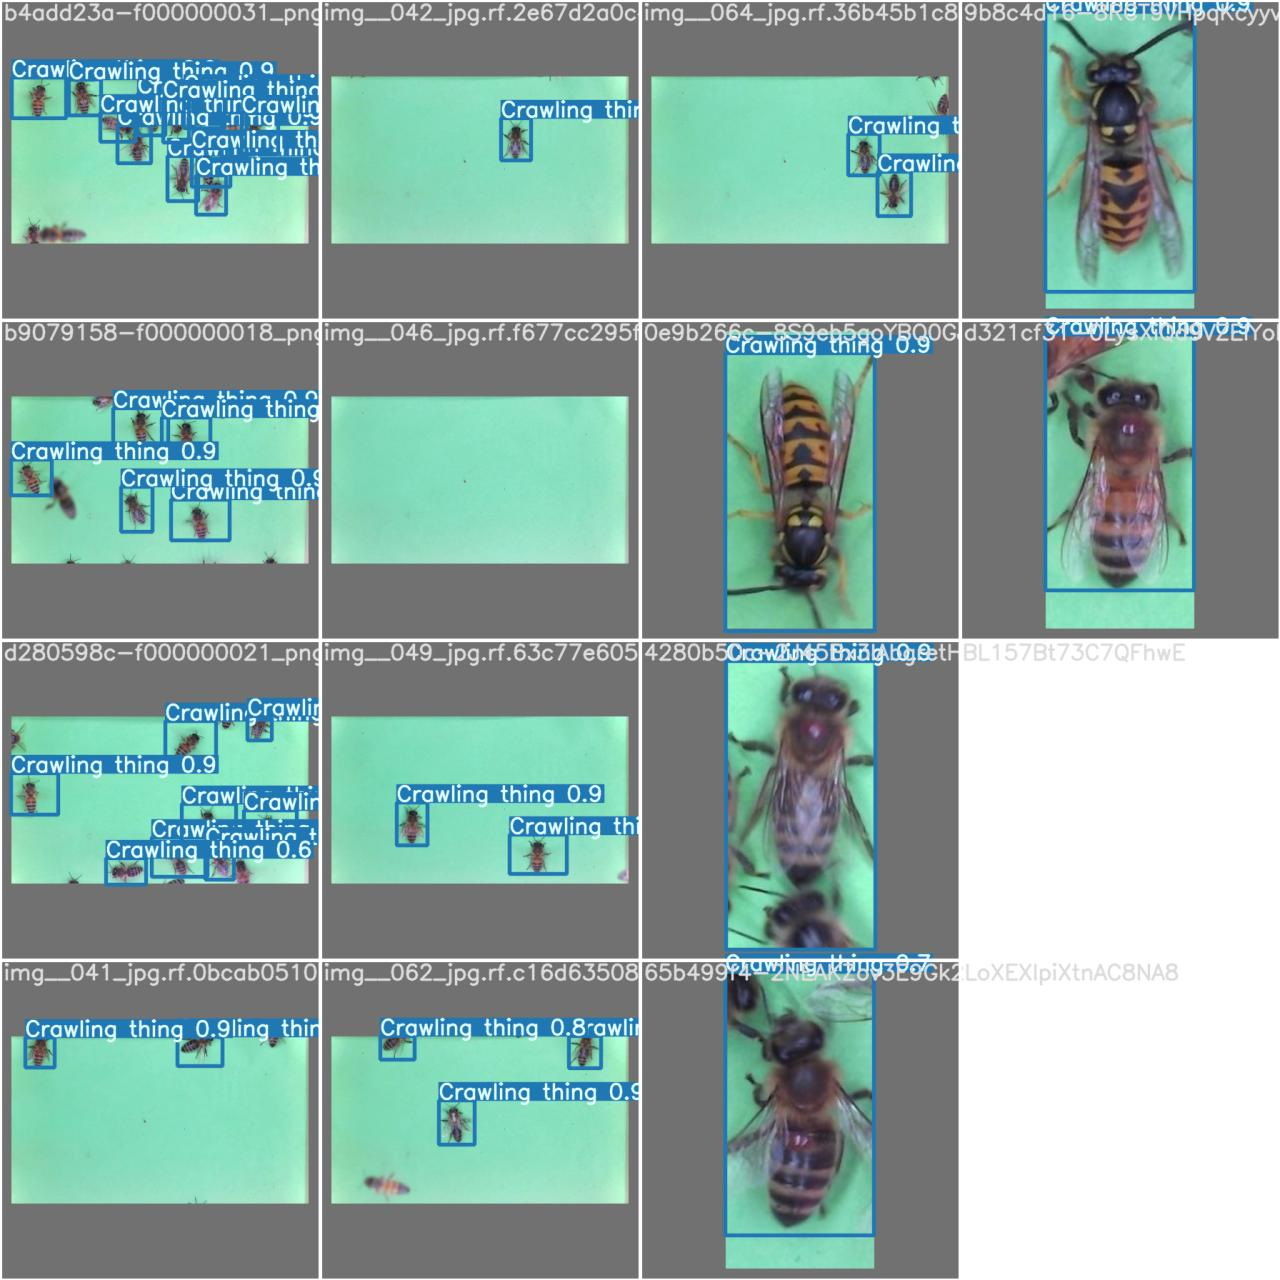

In [29]:
img = cv.imread("/tmp/yolov7/runs/train/exp2/test_batch0_pred.jpg")
plt.figure(figsize=(15, 15))
# plt.imshow(img)
cv2_imshow(img)

# Test the model

This will test the model we have created against an image it has not seen previously.

In [43]:
!python detect.py --img 480 --conf-thres 0.5 --iou-thres 0.3 --source /content/SavedModel/test/images/d1ea6407-f000000017_png.rf.f292506a34acc49cfda2ebe1b05e097d.jpg --weights /tmp/yolov7/runs/train/exp2/weights/best.pt

Namespace(weights=['/tmp/yolov7/runs/train/exp2/weights/best.pt'], source='/content/SavedModel/test/images/d1ea6407-f000000017_png.rf.f292506a34acc49cfda2ebe1b05e097d.jpg', img_size=480, conf_thres=0.5, iou_thres=0.3, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36479926 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert mode

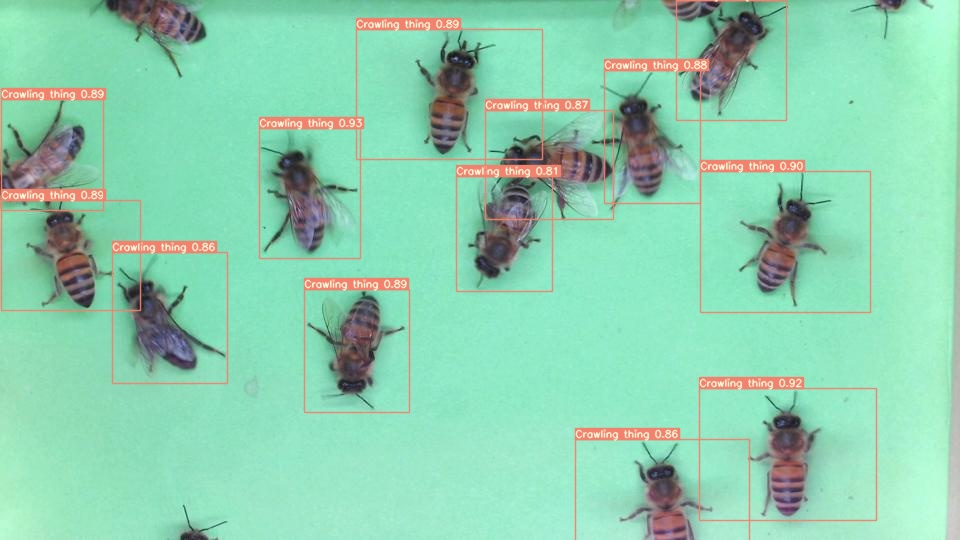

In [44]:
img = cv.imread("runs/detect/exp7/d1ea6407-f000000017_png.rf.f292506a34acc49cfda2ebe1b05e097d.jpg")
# plt.imshow(img)
cv2_imshow(img)